# Árvore de decisão

In [26]:
# Pacotes de preparação dos dados
import pandas as pd
import numpy as np

# Pacontes gráficos
import matplotlib.pyplot as plt 
import seaborn as sns 

# Pacote de modelagem estatística
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# Módulo de Análise Exploratória
import aed

In [27]:
df = pd.read_csv('base_rh.csv', sep=',')

In [28]:
df.Tempo_de_empresa.unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

In [29]:
df.head()

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2


In [30]:
# Dados faltantes 
df.isnull().sum()

Funcionario_Deixou_Empresa    0
Freq_Viagens                  0
Formacao                      0
Estado_Civil                  0
Faz_hora_extras               0
Equilibrio_de_Vida            0
Idade                         0
Tempo_de_empresa              0
dtype: int64

In [31]:
df.duplicated().sum()

33

C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


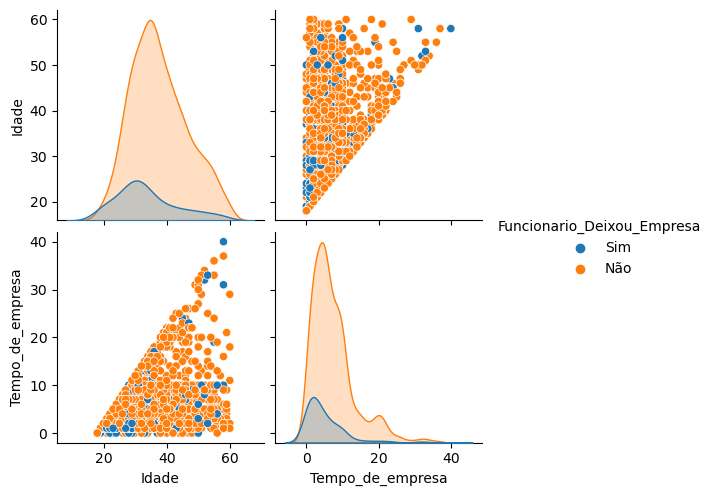

In [32]:
sns.pairplot(df,hue = 'Funcionario_Deixou_Empresa')

# Information Value - IV

In [39]:
df['Target'] = np.where(df['Funcionario_Deixou_Empresa']== 'Sim', 1, 0)

df_iv = aed. analise_iv(df, 'Target') #iv = information value
df_iv.get_lista_iv()

C:\Users\FIC\Desktop\Data\Curso Completo - Programacao Python p DataScience\07 - Aplicações em Data Science\03 - Árvores de Decisão\2_Arvores_Decisao_Turnover_Resolvido\aed.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],


Target,IV
Variavel,
Funcionario_Deixou_Empresa,9.21
Faz_hora_extras,0.40
Tempo_de_empresa,0.34
Idade,0.31
Estado_Civil,0.22
Freq_Viagens,0.13
Equilibrio_de_Vida,0.06
Formacao,0.01


# Modelo: Árvores de Decisão

In [40]:
df

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa,Target
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6,1
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10,0
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0,1
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8,0
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2,0
...,...,...,...,...,...,...,...,...,...
1465,Não,Viaja frequentemente,Ensino Técnico,Casado,Não,Muito bom,36,5,0
1466,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,39,7,0
1467,Não,Viaja raramente,Ensino Superior,Casado,Sim,Muito bom,27,6,0
1468,Não,Viaja frequentemente,Ensino Superior,Casado,Não,Bom,49,9,0


In [41]:
df.Freq_Viagens.unique()

array(['Viaja raramente', 'Viaja frequentemente', 'Não viaja'],
      dtype=object)

In [43]:
df_modelo = pd.get_dummies(df)
df_modelo.head()

,Idade,Tempo_de_empresa,Target,Funcionario_Deixou_Empresa_Não,Funcionario_Deixou_Empresa_Sim,Freq_Viagens_Não viaja,Freq_Viagens_Viaja frequentemente,Freq_Viagens_Viaja raramente,Formacao_Doutorado,Formacao_Ensino Médio,...,Formacao_Mestrado,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Faz_hora_extras_Não,Faz_hora_extras_Sim,Equilibrio_de_Vida_Bom,Equilibrio_de_Vida_Excelente,Equilibrio_de_Vida_Muito bom,Equilibrio_de_Vida_Ruim
0,41,6,1,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
1,49,10,0,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
2,37,0,1,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
3,33,8,0,True,False,False,True,False,False,False,...,True,True,False,False,False,True,False,False,True,False
4,27,2,0,True,False,False,False,True,False,True,...,False,True,False,False,True,False,False,False,True,False


In [48]:
# Target(variável resposta)
y = df_modelo['Target']

# Features (Variáveis explicativas)
x = df_modelo.drop(['Target',
             'Funcionario_Deixou_Empresa_Não',
             'Funcionario_Deixou_Empresa_Sim'],
             axis = 1)

In [65]:
modelo_turnover = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo.fit(x,y)

DecisionTreeClassifier(max_depth=3, random_state=42)

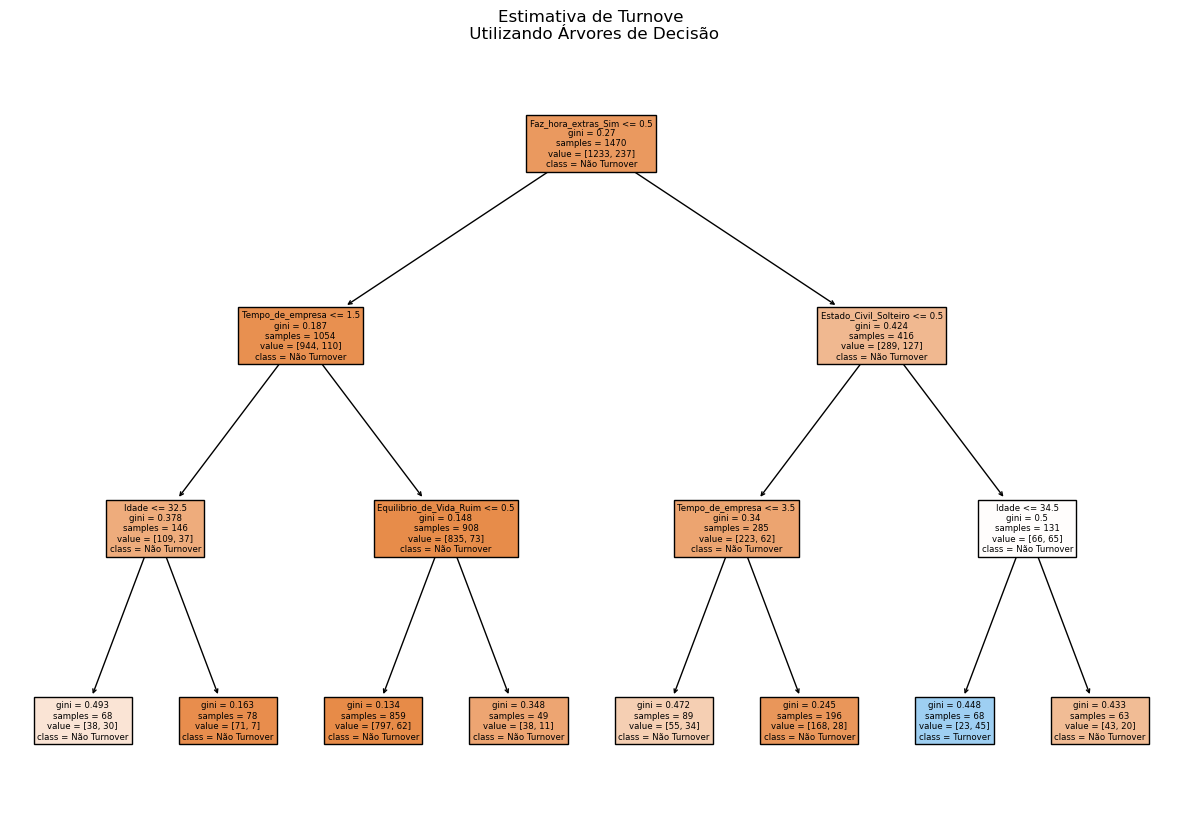

In [66]:
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo,
               feature_names=features,
               class_names=['Não Turnover', 'Turnover'],
               filled=True);
plt.title('Estimativa de Turnove\n Utilizando Árvores de Decisão');

In [54]:
round(accuracy_score(y, modelo.predict(x)),2)

0.85